#Importing The Module


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Collection

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Data PreProcessing

In [ ]:
from google.colab import drive
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/abuse dataset_try_2/twitterdataset.csv")

# Replace 'Abuse' with 1 and 'Non_Abuse' with 0 in the 'label' column
df['label'] = df['label'].replace({'Abuse': 1, 'Non_Abuse': 0})

# Limit to 725 non-abuse samples only
non_abuse_samples = df[df['label'] == 0].head(2725)

# Change 0 to "Non_Abuse" in the label column
non_abuse_samples['label'] = "Non_Abuse"

# Save the modified dataset
non_abuse_samples.to_csv("/content/drive/MyDrive/abuse dataset_try_2/youtube_dataset_2725_non_abuse.csv", index=False)

print("✅ Dataset modified and saved as 'youtube_dataset_2725_non_abuse.csv'")


In [ ]:
# Load the two datasets
df1 = pd.read_csv("/content/drive/MyDrive/abuse_dataset_try/original_dataset _abuse _dataset.csv")
df2 = pd.read_csv("/content/drive/MyDrive/abuse dataset_try_2/youtube_dataset_2725_non_abuse.csv")

# Merge the datasets
merged_df = pd.concat([df1, df2], ignore_index=True)

# Save the merged dataset to a new CSV file
merged_df.to_csv("/content/drive/MyDrive/abuse dataset_try_2/merged_dataset.csv", index=False)

print("✅ Datasets merged and saved as 'merged_dataset.csv'")


In [7]:
df = pd.read_csv(r'/content/drive/MyDrive/abuse dataset_try_2/merged_dataset.csv')

In [8]:
df['label'].value_counts()

,count
label,
Abuse,3066
Non_Abuse,3002


In [9]:

df = df[['text', 'label' ]]
df.head()
df.shape


(6068, 2)

In [10]:
df.shape

(6068, 2)

In [11]:
df.duplicated().sum()

8

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [13]:
df.shape

(6060, 2)

In [14]:
df.isnull().sum()


,0
text,0
label,0


In [15]:
df.shape

(6060, 2)

In [16]:
df['label'].value_counts()


,count
label,
Abuse,3059
Non_Abuse,3001


In [17]:
df.columns

Index(['text', 'label'], dtype='object')

#Average word count

In [ ]:
df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))

# Calculate the average word count
average_word_count = df["word_count"].mean()

print(f"The average word count is: {average_word_count}")

The average word count is: 42.5990099009901


#Max word count

In [ ]:
# max word count
max_word_count = df['text'].max()
print(f"The maximum word count is: {max_word_count}")

The maximum word count is: 😊 *Muslims If you need commentary to understand the Koran. Then ALL👹H has FAILED. No true god WILL make this fundamental ERROR. Honestly it is time to leave this CULT of ISLAM and seek better Muslims!* 👍


In [ ]:
df['word_count'].describe()

,word_count
count,9827.000000
mean,34.495573
std,84.137463
min,1.000000
25%,9.000000
50%,16.000000
75%,33.000000
max,2367.000000


In [ ]:
df.head()

,text,label,word_count
0,Stay the fuck away from islam!,1,6
1,I would fuck her silly. Judge is a fucking leg...,1,10
2,That lady it the red coat is hot as fuck. Make...,1,17
3,Smoke means water vapor also earth is made of ...,1,17
4,"Judges should be allowed to say ""shut the fuck...",1,19


#Use the Albert Model

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/abuse dataset_try_2/merged_dataset.csv')

In [18]:
from transformers import AlbertForSequenceClassification, AlbertTokenizer

# Load pre-trained ALBERT model for multiclass classification
model = AlbertForSequenceClassification.from_pretrained('albert-base-v1', num_labels=len(df['label'].unique()))  # Adjust num_labels as per your classes
tokenizer = AlbertTokenizer.from_pretrained("albert-base-v1")

# If you want to load a model from a specific checkpoint, you can do so by replacing the pretrained model name with the checkpoint path
# model = AlbertForSequenceClassification.from_pretrained('/content/results/checkpoint-1788')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

#Split the Training,Validation

In [19]:
from sklearn.model_selection import train_test_split
# Split the data into train and validation sets (80% train, 20% validation)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
!pip install Datasets

In [21]:
from datasets import Dataset
# Converting the DataFrames to Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

def preprocess_function(examples):
    examples['labels'] = examples['label']
    return tokenizer(examples["text"], padding="max_length", truncation=True)

# Tokenize the datasets
train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/4848 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

In [25]:


# ✅ Step 5: Save to Disk (Optional, for future use)
val_dataset.save_to_disk("/content/drive/MyDrive/abuse dataset_try_2/val_dataset")

print("Validation dataset created successfully!")

Saving the dataset (0/1 shards):   0%|          | 0/1212 [00:00<?, ? examples/s]

Validation dataset created successfully!


In [24]:
val_dataset

Dataset({
    features: ['text', 'label', '__index_level_0__', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1212
})

In [ ]:
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
from transformers import Trainer, TrainingArguments
from datasets import Dataset
import torch
from sklearn.metrics import accuracy_score

# ✅ Ensure labels are correctly formatted (Convert "Abuse" -> 1, "Non_Abuse" -> 0)
def convert_labels(example):
    if example['label'] == "Abuse":
        example['label'] = 1
    elif example['label'] == "Non_Abuse":
        example['label'] = 0
    return example

# ✅ Apply conversion to datasets
train_dataset = train_dataset.map(convert_labels)
val_dataset = val_dataset.map(convert_labels)

# ✅ Compute metrics function
def compute_metrics(p):
    preds = p.predictions.argmax(-1)  # Get predicted class
    labels = p.label_ids
    accuracy = accuracy_score(labels, preds)  # Compute accuracy
    return {"accuracy": accuracy}

# ✅ Define training arguments
training_args = TrainingArguments(
    output_dir='./results',              # Save model & checkpoints
    eval_strategy="epoch",               # Evaluate every epoch (fixed deprecation warning)
    save_strategy="epoch",               # Save checkpoint every epoch
    logging_dir='./logs',                # Log directory
    num_train_epochs=15,                  # Number of epochs
    per_device_train_batch_size=16,      # Batch size for training
    per_device_eval_batch_size=16,       # Batch size for evaluation
    logging_steps=10,                    # Log every 10 steps
    save_total_limit=3,                   # Keep last 3 checkpoints
    load_best_model_at_end=True,          # Load best model at the end
    report_to=[],                         # Disable WandB logging
)

# ✅ Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics  # Compute accuracy
)

# ✅ Start training
trainer.train()


Map:   0%|          | 0/4848 [00:00<?, ? examples/s]

Map:   0%|          | 0/1212 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy
1,0.221700,0.214406,0.928218
2,0.202900,0.201005,0.942244
3,0.101300,0.270197,0.939769
4,0.048400,0.218782,0.945545
5,0.097300,0.263765,0.938944
6,0.135900,0.295568,0.934818
7,0.026500,0.393125,0.933168
8,0.016200,0.429166,0.936469
9,0.030700,0.465801,0.933993
10,0.000100,0.499503,0.929043


TrainOutput(global_step=4545, training_loss=0.07090222773440433, metrics={'train_runtime': 6704.199, 'train_samples_per_second': 10.847, 'train_steps_per_second': 0.678, 'total_flos': 1737869959987200.0, 'train_loss': 0.07090222773440433, 'epoch': 15.0})

#Evaluate the Result

In [ ]:
# Evaluate the model on validation data
val_results = trainer.evaluate(val_dataset)

# Extract loss and accuracy
val_loss = val_results.get("eval_loss", "N/A")
val_acc = val_results.get("eval_accuracy", 0)  # Default to 0 if not found

# Print validation loss and accuracy
print(f"Validation loss: {val_loss}")
print(f"Validation accuracy: {val_acc}")


Validation loss: 0.2010054886341095
Validation accuracy: 0.9422442244224423


#Save the Model

In [ ]:
trainer.save_model("/content/drive/MyDrive/abuse dataset_try_2/model")
tokenizer.save_pretrained("/content/drive/MyDrive/abuse dataset_try_2/model")


('/content/drive/MyDrive/abuse dataset_try_2/model/tokenizer_config.json',
 '/content/drive/MyDrive/abuse dataset_try_2/model/special_tokens_map.json',
 '/content/drive/MyDrive/abuse dataset_try_2/model/spiece.model',
 '/content/drive/MyDrive/abuse dataset_try_2/model/added_tokens.json')

#Classification Report

In [ ]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the model
predictions = trainer.predict(val_dataset)

# Convert logits to predicted class labels
pred_labels = np.argmax(predictions.predictions, axis=1)

# Get the actual labels
true_labels = predictions.label_ids

# Print classification report
print("Classification Report:\n", classification_report(true_labels, pred_labels))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       568
           1       0.93      0.96      0.95       644

    accuracy                           0.94      1212
   macro avg       0.94      0.94      0.94      1212
weighted avg       0.94      0.94      0.94      1212



#Confusion Matrix

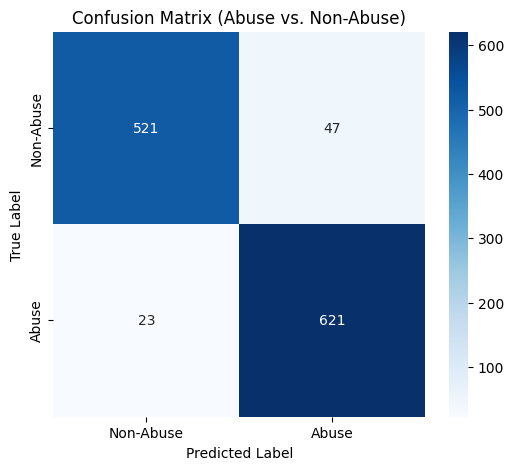

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_labels, pred_labels)

labels = ["Non-Abuse", "Abuse"]

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Abuse vs. Non-Abuse)")
plt.show()

#Load the Model

In [ ]:
from transformers import AlbertForSequenceClassification, Trainer, TrainingArguments

# Define model directory (change if different)
model_dir = "/content/drive/MyDrive/abuse dataset_try_2/model"

# Load fine-tuned ALBERT model
model = AlbertForSequenceClassification.from_pretrained(model_dir)

# Load training arguments (optional, for evaluation)
training_args = TrainingArguments(output_dir=model_dir)

# Reload trainer with fine-tuned model
trainer = Trainer(model=model, args=training_args)

print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [10]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.1 MB/s eta 0:00:00


# Plotting Training and Validation Accuracy

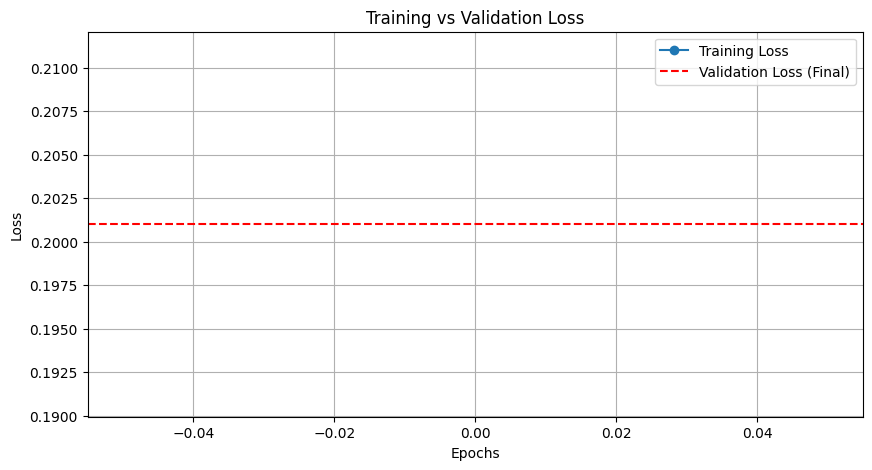

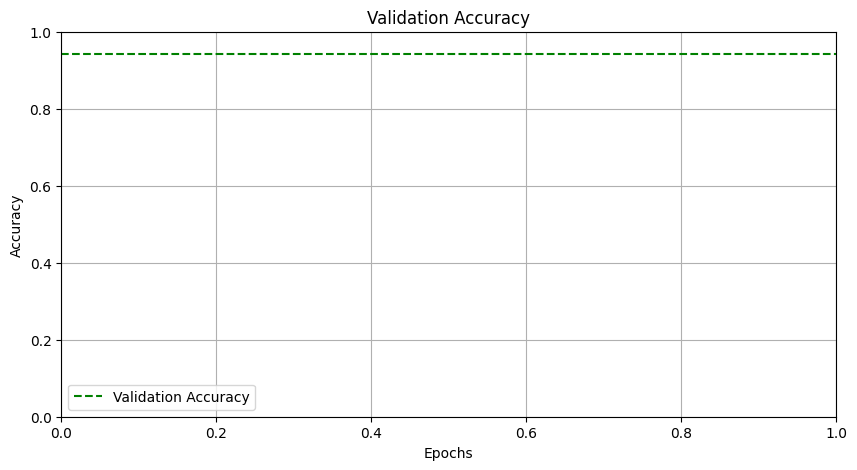

✅ Model evaluated on validation set | Loss: 0.2010, Accuracy: 0.9422


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import AlbertForSequenceClassification, Trainer, TrainingArguments, AutoTokenizer
from datasets import load_from_disk
import evaluate

# Define paths
model_dir = "/content/drive/MyDrive/abuse dataset_try_2/model"
val_dataset_path = "/content/drive/MyDrive/abuse dataset_try_2/val_dataset"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("albert-base-v1")

# Load fine-tuned ALBERT model
model = AlbertForSequenceClassification.from_pretrained(model_dir)

# Load validation dataset
val_dataset = load_from_disk(val_dataset_path)

# Convert string labels to integers
label_map = {"Non_Abuse": 0, "Abuse": 1}  # Adjust mapping if needed

def convert_labels(example):
    example["label"] = label_map[example["label"]]  # Convert label string to integer
    return example

val_dataset = val_dataset.map(convert_labels)

# Ensure dataset is tokenized
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length")

val_dataset = val_dataset.map(tokenize_function, batched=True)

# ✅ Use Hugging Face's new `evaluate` library for accuracy
accuracy_metric = evaluate.load("accuracy")

# Function to compute accuracy
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)  # Convert logits to class predictions
    return accuracy_metric.compute(predictions=predictions, references=labels)

# Load training arguments (disable wandb)
training_args = TrainingArguments(
    output_dir=model_dir,
    report_to="none",  # Disables wandb logging
    per_device_eval_batch_size=16  # Adjust batch size if needed
)

# Reload trainer with accuracy metric
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics
)

# Evaluate on validation dataset
eval_results = trainer.evaluate(val_dataset)

# Extract loss and accuracy
val_loss = eval_results["eval_loss"]
val_accuracy = eval_results["eval_accuracy"]  # Now accuracy should be present!

# Extract training loss from logs
train_loss = [log["loss"] for log in trainer.state.log_history if "loss" in log]
epochs = list(range(1, len(train_loss) + 1))  # Assuming 1 epoch per entry

# Plot Training Loss vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label="Training Loss", marker="o", linestyle="-")
plt.axhline(y=val_loss, color="r", linestyle="--", label="Validation Loss (Final)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(10, 5))
plt.axhline(y=val_accuracy, color="g", linestyle="--", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

print(f"✅ Model evaluated on validation set | Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")


# Prediction for both Abuse and Non_Abuse

In [ ]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification
import torch

# Load tokenizer and model (Ensure paths are correct)
model_path = "/content/drive/MyDrive/abuse dataset_try_2/model"
tokenizer = AlbertTokenizer.from_pretrained(model_path)
model = AlbertForSequenceClassification.from_pretrained(model_path)

# Move model to device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Example new texts
new_texts = [
    "Your ideas are brilliant and truly inspiring",
    "greece and serbia against all hd p youtube thank you brother greeks"
]

# Tokenize inputs (without return_tensors="pt")
tokenized_inputs = tokenizer(new_texts, padding="max_length", truncation=True, max_length=512)

# Convert tokenized inputs to PyTorch tensors manually
input_ids = torch.tensor(tokenized_inputs["input_ids"])
attention_mask = torch.tensor(tokenized_inputs["attention_mask"])

# Move inputs to the same device as the model
input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    predictions = torch.argmax(outputs.logits, dim=1)

# Print predictions
print("Predictions:", predictions.tolist())  # 0 = non-abusive, 1 = abusive


Predictions: [0, 0]


#Real Time Prediction

#Prediction for Abuse

In [ ]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification
import torch

# Load tokenizer and model (Ensure paths are correct)
model_path = "/content/drive/MyDrive/abuse dataset_try_2/model"
tokenizer = AlbertTokenizer.from_pretrained(model_path)
model = AlbertForSequenceClassification.from_pretrained(model_path)

# Move model to device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Example abusive texts
abusive_texts = [
    "You are an idiot, no one cares about your opinion."

]

# Tokenize inputs
tokenized_inputs = tokenizer(abusive_texts, padding="max_length", truncation=True, max_length=512)

# Convert to PyTorch tensors
input_ids = torch.tensor(tokenized_inputs["input_ids"]).to(device)
attention_mask = torch.tensor(tokenized_inputs["attention_mask"]).to(device)

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    predictions = torch.argmax(outputs.logits, dim=1).tolist()

# Display only abusive sentences
print("\n🔴 Abusive Sentences:")
for text, label in zip(abusive_texts, predictions):
    if label == 1:
        print(f"- {text}")



🔴 Abusive Sentences:
- You are an idiot, no one cares about your opinion.


#Prediction for Non abuse

In [ ]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification
import torch

# Load tokenizer and model (Ensure paths are correct)
model_path = "/content/drive/MyDrive/abuse dataset_try_2/model"
tokenizer = AlbertTokenizer.from_pretrained(model_path)
model = AlbertForSequenceClassification.from_pretrained(model_path)

# Move model to device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Example non-abusive texts
non_abusive_texts = [
    "Your ideas are brilliant and truly inspiring",

]

# Tokenize inputs
tokenized_inputs = tokenizer(non_abusive_texts, padding="max_length", truncation=True, max_length=512)

# Convert to PyTorch tensors
input_ids = torch.tensor(tokenized_inputs["input_ids"]).to(device)
attention_mask = torch.tensor(tokenized_inputs["attention_mask"]).to(device)

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    predictions = torch.argmax(outputs.logits, dim=1).tolist()

# Display only non-abusive sentences
print("\n🟢 Non-Abusive Sentences:")
for text, label in zip(non_abusive_texts, predictions):
    if label == 0:
        print(f"- {text}")



🟢 Non-Abusive Sentences:
- Your ideas are brilliant and truly inspiring
